# Homework 5

## Monte Carlo Method

Evaluate the integral $I = \int_{-\infty}^{\infty} \frac{1}{1 + x^2} dx$ using two montecarlo methods:

### The Mean Method

1. **Transform the domain:** Since the domain is unbounded, it is necessary to make a change of variables to map the unbounded domain to a bounded one.

2. **Importance Sampling** Additionally, it is important to use importance sampling, where samples are taken from a probability distribution that covers the entire real domain, such as the normal distribution.

3. **Exact Result for Comparison:** The exact result of the integral by mathematical methods is:

$$
\int_{-\infty}^{\infty} \frac{1}{x^2 + 1} dx = \pi
$$

4. **Monte Carlo Integration with Importance Sampling**

Using the standard normal distribution $G(\mu = 0, \sigma = 1)$ por sampling.

The probability density function for the standard normal distribution is

$$
p(x) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}}
$$

5. **Monte Carlo Estimator:**

For $NE$ samples $\{x_i\}^{NE}_{i=1}$ drawn from $G(0, 1)$, the Monte Carlo estimate is:

$$
I \approx \frac{1}{NE} \sum^{NE}_{i=1}\frac{f(x_i)}{p(x_i)} = \frac{1}{N}\sum^{N}_{i=1} \frac{\frac{1}{x^2_i + 1}}{\frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2_i}{2}}}
$$

Simplifying,

$$
I \approx \sum^{NE}_{i=1} \frac{\sqrt{2 \pi}}{x^2_i + 1} e^{\frac{x^2_i}{2}}
$$


In [746]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import norm
from scipy.optimize import curve_fit

In [682]:
# Number of samples
N_MM = 1000000

# Function to integrate
def f(x):
    return 1 / (x**2 + 1)

# Probability density function of the standard normal distribution
def normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Generate samples from the standard normal distribution
samples = np.random.normal(0, 1, N_MM)

# Compute the Monte Carlo estimate
estimate = np.mean(f(samples) / normal_pdf(samples))

print("The value of I is: ", estimate)

error = abs((np.pi - estimate) / np.pi *100)

print("The percentage difference with respect to the theoretical value of pi is: {0:.2f} %".format(error))


The value of I is:  2.805007199270842
The percentage difference with respect to the theoretical value of pi is: 10.71 %


### Hit and Miss

Steps for Hit or Miss Monte Carlo Integration

1. **Define the Integral:**

$$
I = f(x_i) = \int_{-\infty}^{\infty} \frac{1}{1 + x^2} dx
$$

2. **Determine the Bounding Box:**
  * Width: It is necessary to select a large interval $[-L, L]$ to approximate the integral. In this case $L = 10$.
  * Heigh: $M$, where $M$ is an upper bound for $f(x)$ in the interval. $M=1$ since $\frac{1}{x^2 + 1} \leq 1$ for all $x$.

3. **Generate Random Points:** Randomly generate $N$ points $(x_i, y_i)$ within this bounding box. The $x$-coordinates are uniformly distributed over $[-L, L]$, and $y$-coordinates are uniformly distribued obes $[0, M=1]$

4. **Count hits:** Count the number of points that fall below the curve of $f(x)$. A point $(x_i, y_i)$ is considered a "hit"if $y_i \leq f(x_i)$

5. **Estimate the Integral:** The ratio of hits to total points, multiplied by the area of the bounding box, gives the estimate of the integral:

$$
I \approx \frac{\text{Number of hits}}{N} \times (L - (-L)) \times M
$$

The integral estimate will give an approximation that can be compared to $\pi$. To improve accuracy, $L$ can be increased, and the number of samples $N$ can be increased.

In [683]:
# Number of samples
N_HM = 10000

# Interval [-L, L]
L = 10  # A large value to approximate infinity

# Upper bound for the function
M = 1

# Generate random points
x_random = np.random.uniform(-L, L, N_HM)
y_random = np.random.uniform(0, M, N_HM)

# Count the number of hits
hits = np.sum(y_random <= f(x_random))

# Estimate the integral
area_box = 2 * L * M
integral_estimate = (hits / N_HM) * area_box

print("The value of I is: ", integral_estimate)

errorH = abs((np.pi - integral_estimate) / np.pi *100)

print("The percentage difference with respect to the theoretical value of pi is: {0:.2f} %".format(errorH))

The value of I is:  2.948
The percentage difference with respect to the theoretical value of pi is: 6.16 %


It can be observed that the Hit or Miss method is much more accurate than the mean value method since the percentage difference with respect to the theoretical value is usually below $10\%$.

## Inverse Transform Sampling Method

Inverse transform sampling is a basic method for pseudo-random number sampling, i.e., for generating sample numbers at random from any probability distribution given its cumulative distribution function (CDF).

1. **Cumulative Distribution Function:**

The PDF is
$$
\begin{align}
    f(E) &=
    \begin{cases}
        1 / E & \text{if } 0.1 < E < 0.95 \\
        0 & \text{if } E < 0.1 \text{ or } E > 0.95
    \end{cases}\\
\end{align}
$$

The CDF $F(E)$ can be found by integrating $f(E)$.

$$
F(E) = \int^{E}_{0.1} \frac{1}{x} dx = \ln{(E)} - \ln{(0.1)} = \ln{\left(\frac{E}{0.1}\right)}
$$

Normalized over the range $[0.1,0.95]$ the CDF becomes:

$$
F(E) = \frac{\ln{\left(\frac{E}{0.1}\right)}}{\ln{\left(\frac{0.95}{0.1}\right)}}
$$

2. **Inverse transform sampling:** The inverse CDF, $F^{-1}(u)$, where $u$ is a uniform random variable $u \sim U(0,1)$, gives the sample of the desired distribution. It is solved for $E = F^{-1}(u)$.

$$
\begin{align}
  F(F^{-1}(u)) &= u \\
  \frac{\ln{\left(\frac{E}{0.1}\right)}}{\ln{\left(\frac{0.95}{0.1}\right)}} &= u \\
  \ln{\left(\frac{E}{0.1}\right)} &= u \ln{\left(\frac{0.95}{0.1}\right)} \\
  \ln{\left(\frac{E}{0.1}\right)} &= \left[\ln{\left(\frac{0.95}{0.1}\right)}\right]^u \\
  E &= 0.1 \left(\frac{0.95}{0.1}\right)^u
\end{align}
$$

3. **Applying Gaussian Smearing:** To implement the resolution, each energy value $E_i$ extracted from the spectrum
$f(E)$ has to be smeared for the resolution $$\sigma(E_i) = \frac{0.1 E_i}{\sqrt{E_i}} = 0.1 \sqrt{(E_i)[\text{MeV}]}$$.
The histogram is filled with the smeared energy according to resolution $$E'_i = g[E_i; \sigma(E_i)] = E_i + \sigma(E_i) g[0;1],$$ where $g[0;1]$ is a random variable distributed as a gaussian with zero mean and unitary standard
deviation, this is obtained by generating a Gaussian-distributed random number.

4. **Plotting:** A histogram of the smeared energy values using 100 bins is created.There is also a comparison with the $1/E$ function and the convolution calculated in homework 1.


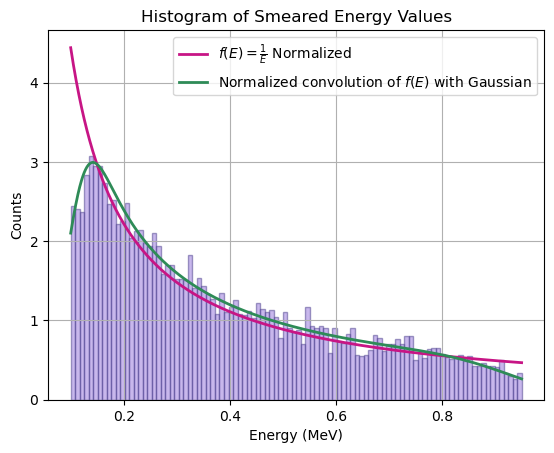

In [684]:
# Number of samples
NE = 10000

# Function to generate E from the distribution f(E) = 1/E for 0.1 < E < 0.95
def generate_energy_values(NE):
    # Define the range
    a = 0.1
    b = 0.95

    # Generate uniform random numbers between 0 and 1
    u = np.random.uniform(0, 1, NE) # u ~ U(0, 1)

    # Use the inverse CDF to transform uniform samples to follow the distribution f(E) = 1/E
    energies = a * (b / a)**u

    return energies

# Function to apply Gaussian smearing
def smear_energy(E):
    sigma = 0.1 * np.sqrt(E)  # sigma(E) = 0.1 * E / sqrt(E)
    smeared_E = E + sigma * np.random.normal(0, 1, E.shape)
    return smeared_E

# Define the Gaussian function
def gaussian(E, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (E / sigma)**2)

# Generate energy values
E_values = generate_energy_values(NE)

# Apply Gaussian smearing
smeared_E_values = smear_energy(E_values)

# Plot the histogram of smeared energy values
counts, bins, patches = plt.hist(smeared_E_values, bins=100, range=(0.1, 0.95), density=True, alpha=0.5, color='mediumpurple', edgecolor='darkslateblue')

# Generate E values for plotting the function f(E)
E_plot = np.linspace(0.1, 0.95, 1000)
f_plot = 1 / E_plot

# Normalize f(E) to compare with the histogram
# To normalize, we scale f(E) by the same factor used in the histogram binning
normalization_factor = np.trapz(f_plot, E_plot)
f_plot_normalized = f_plot / normalization_factor

# Perform the convolution
sigma_values = 0.1 * np.sqrt(E_plot)
convolution_result = np.zeros_like(E_plot)
for i in range(len(E_plot)):
    gaussian_vals = gaussian(E_plot[i] - E_plot, sigma_values)
    convolution_result[i] = np.trapz(f_plot * gaussian_vals, E_plot)

# Normalize the convolution result
normalization_factor_conv = np.trapz(convolution_result, E_plot)  # Integral of the convolution result
convolution_result_normalized = convolution_result / normalization_factor_conv

# Plot the normalized function f(E)
plt.plot(E_plot, f_plot_normalized, color='mediumvioletred', linewidth=2, label=r'$f(E) = \frac{1}{E}$ Normalized')

# Plot the convolution result
plt.plot(E_plot, convolution_result_normalized, color='seagreen', linewidth=2, label='Normalized convolution of $f(E)$ with Gaussian')

# Add titles and labels
plt.title('Histogram of Smeared Energy Values')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.show()


It can be observed that the result of the convolution really fits the created histogram.

## $K_L$ Data Generation

### Angular distribution data generator

First, we'll generate $K_L$ particles following the angular distribution $dN / d\Omega \propto \sin^2{\theta}$

Then 

$$
    \frac{dN}{d\theta d\phi} \propto \sin^3{\theta}
$$

1. Probability Density Function (PDF):
    $$
        f(\theta) \propto \sin^3{\theta}
    $$
    The normalized PDF is:
    $$
        f(\theta) = \frac{3}{4} \sin^3{\theta}
    $$
    Where the normalization constant $\frac{3}{4}$ ensures the integral over $[0, \pi]$ equals $1$.

2. Cumulative Distribution Function (CDF):
    $$
    F(\theta) = \int_0^\theta f(\theta ') d\theta ' = \frac{\cos^3{\theta}}{4} - \frac{3}{4}\cos{\theta} + \frac{1}{2}
    $$

3. Inverse CDF:
    The inverse of the CDF is found using numerical methods.


/tmp/ipykernel_66947/781148618.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  theta_solution = fsolve(g, initial_guess)


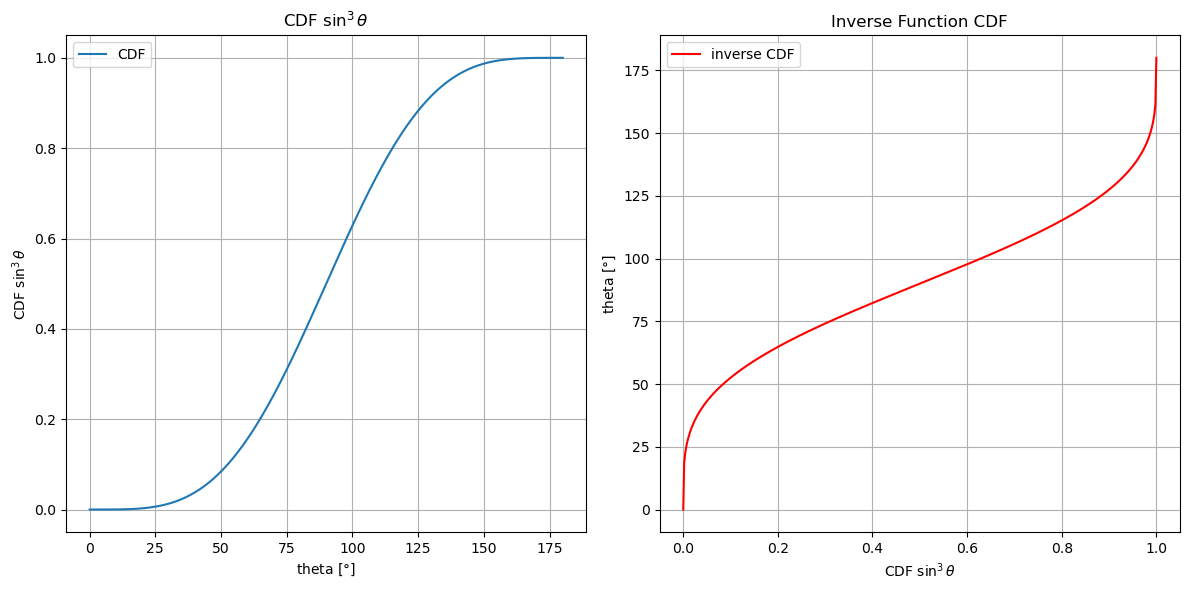

In [685]:
# Define the original CDF function
def cdf(theta):
    theta_rad = np.deg2rad(theta)
    cos_theta = np.cos(theta_rad)
    return - 3/4 * cos_theta + (1/4) * cos_theta**3 + 1/2

# Define the inverse CDF function
def inverse_cdf(y, initial_guess):
    def g(theta):
        return cdf(theta) - y
    theta_solution = fsolve(g, initial_guess)
    return theta_solution[0]

# Generate y values for the function
theta_values = np.linspace(0, 180, 500)
y_values = cdf(theta_values)

# Generate inverse values
y_test_values = np.linspace(np.min(y_values), np.max(y_values), 500)
inverse_theta_values = [inverse_cdf(y, initial_guess=90) for y in y_test_values]

# Plot the original function and its inverse
plt.figure(figsize=(12, 6))

# Original function plot
plt.subplot(1, 2, 1)
plt.plot(theta_values, y_values, label='CDF')
plt.xlabel('theta $[\\degree]$')
plt.ylabel('CDF $\\sin^3{\\theta}$')
plt.title('CDF $\\sin^3{\\theta}$')
plt.grid(True)
plt.legend()

# Inverse function plot
plt.subplot(1, 2, 2)
plt.plot(y_test_values, inverse_theta_values, label='inverse CDF', color='red')
plt.xlabel('CDF $\\sin^3{\\theta}$')
plt.ylabel('theta $[\\degree]$')
plt.title('Inverse Function CDF')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


4. $\phi$ distribution data generator: Generate $N$ uniform random numbers for $\phi$ in $[0, 2\pi]$

5. Generate $N$ uniform random numbers for $\theta$ and solve the inverse CDF to get the corresponding $\theta$ values.

### Exponential Decay Law

The $K_L$ mesons follow an exponential decay law. The probability that a $K_L$ meson decays at a time $t$ is given by the exponential distribution:

$$
    P(t) = \frac{1}{\tau} e^{-t/\tau}
$$

where $\tau = 51.16$ ns is the mean lifetime of the $K_L$ meson.

To generate decay times for $K_L$ mesons, the inverse transform sampling method is used.

1. CDF of Exponential Distribution:
    $$
        F(t) = 1 - e^{-t/\tau}
    $$
2. Inverse CDF:
    $$
        t = -\tau \ln{(1 - u)}
    $$
    where $u$ is a uniform random number in $[0, 1]$.

In the end, a $\theta$, $\phi$ and decaying time $t$ are associated with each particle.

In [686]:
# Number of samples
N = 254327

# Speed of light in cm/ns
c = 29.9792  # cm/ns

m_phi = 1019.461  # mass of phi meson in MeV / c^2
m_KL = 497.611  # mass of K_L meson in MeV / c^2

# Calculate speed of K_L mesons
E_phi = m_phi # phi at rest
E_KL = E_phi / 2
p_KL = np.sqrt(E_KL**2 - (m_KL)**2) / c
v_KL = (p_KL * c**2) / E_KL  # speed of KL mesons

beta = v_KL / c
gamma = 1 / np.sqrt(1 - beta**2)
E_KL = gamma * m_KL  # Relativistic energy of each K_L meson

# Mean lifetime of K_L in nanoseconds
tau = 51.16 

# Inverse transform sampling for theta
def generate_theta(N):
    u = np.random.uniform(0, 1, N)
    
    # Generate samples from the desired distribution using the inverse CDF
    theta = [inverse_cdf(u_i, initial_guess=90) for u_i in u]
    
    return theta  # Convert from radians to degrees

# Generate phi values uniformly
def generate_phi(N):
    phi = np.random.uniform(0, 2*np.pi, N)
    return np.degrees(phi)  # Convert from radians to degrees

# Generate decay times based on exponential distribution
def generate_decay_times(N, tau):
    proper_lifetime = tau
    u = np.random.uniform(0, 1, N)
    return -proper_lifetime * np.log(1 - u)

def generate_distances(decay_times, v_KL):
    """Traveled Distances."""
    return v_KL * decay_times

# Generate the theta, phi, and decay times
theta_values = generate_theta(N)
phi_values = generate_phi(N)
decay_times = generate_decay_times(N, tau)
r_values = generate_distances(decay_times, v_KL)


# Create a structured array to store particle data
particles = np.zeros(N, dtype={'names': ('distance', 'theta', 'phi', 'energy', 'time_to_reach', 'x', 'y', 'z'),
                               'formats': ('f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8')})

particles['distance'] = r_values
particles['theta'] = theta_values
particles['phi'] = phi_values
particles['energy'] = E_KL
particles['time_to_reach'] = decay_times

# Calculate x, y, z coordinates
particles['x'] = particles['distance'] * np.sin(np.deg2rad(particles['theta'])) * np.cos(np.deg2rad(particles['phi']))
particles['y'] = particles['distance'] * np.sin(np.deg2rad(particles['theta'])) * np.sin(np.deg2rad(particles['phi']))
particles['z'] = particles['distance'] * np.cos(np.deg2rad(particles['theta']))


In [687]:
print(f"Speed of K_L mesons: {v_KL:.2f} cm/ns")
print(f"Beta K_L mesons: {beta:.3f}")
print(f"Maximum distance a K_L meson can travel: {v_KL * tau:.2f} cm")
print(f"Energy K_L: {E_KL:.2f} MeV")
print(f"P K_L: {p_KL:.2f} MeV")

Speed of K_L mesons: 6.50 cm/ns
Beta K_L mesons: 0.217
Maximum distance a K_L meson can travel: 332.46 cm
Energy K_L: 509.73 MeV
P K_L: 3.69 MeV


### Histograms

In [788]:
# Function to calculate the Crystal Ball function
def crystal_ball(x, A, B, C, D):
    return A * np.exp(-0.5 * ((x - B) / C) ** 2) + D

# Function to plot histogram and add a minimalist stats table with increased row spacing
def plot_histogram_with_stats(data, title, x_title):
    # Adjust figure size for clarity
    fig, ax = plt.subplots(figsize=(6, 4))  # Smaller figure size for a compact display
    entries, edges, patches = ax.hist(data, bins=50, histtype='step', edgecolor='black')
    
    # Calculate stats
    mean = np.mean(data)
    rms = np.sqrt(np.mean(data**2))
    stddev = np.std(data)
    
    # Prepare stats for the table
    stats = [
        ["Entries", f"{len(data):.0f}"],
        ["Mean", f"{mean:.2f}"],
        ["RMS", f"{rms:.2f}"],
        ["Std Dev", f"{stddev:.2f}"]
    ]
    
    # Add a table with stats, increasing the vertical space between rows
    table = ax.table(cellText=stats, colLabels=["Stat", "Value"], loc='upper right', cellLoc='center', 
                     bbox=[0.7, 0.65, 0.25, 0.20])
    table.auto_set_font_size(False)
    table.set_fontsize(9)  # Font size adjusted to match the smaller plot
    table.scale(1, 2)  # Increased vertical scaling for greater row spacing

    # Configure table cell borders
    for key, cell in table.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            cell.set_edgecolor('black')  # Retain border for header and outer borders
        else:
            cell.set_edgecolor('none')  # Internal lines made invisible

    ax.set_title(title)
    ax.set_xlabel(x_title)
    ax.set_ylabel('Frequency')
    plt.show()


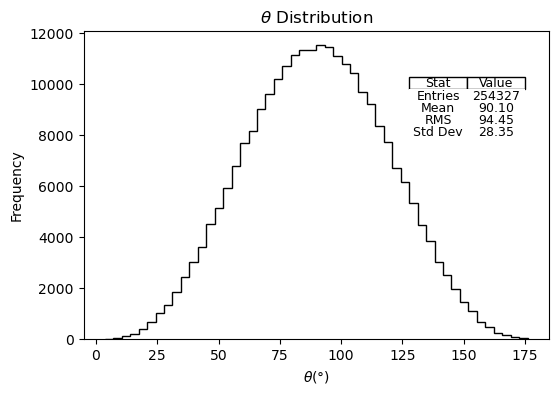

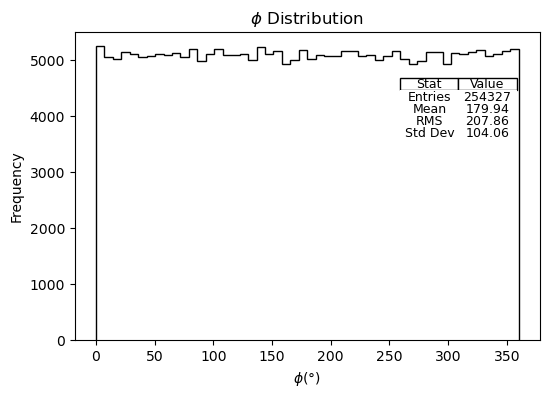

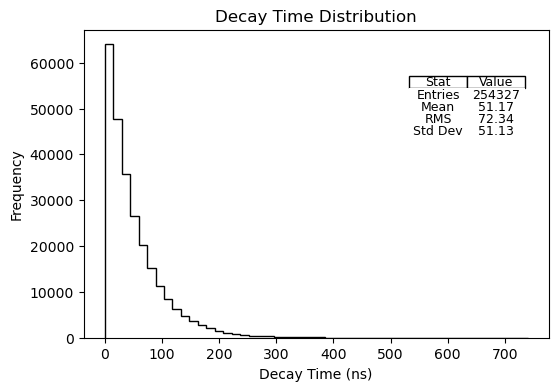

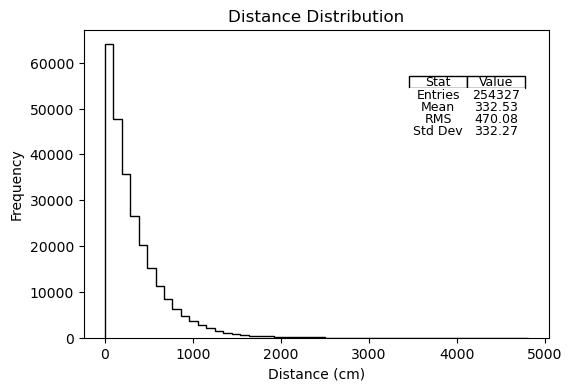

In [789]:
# Plot histograms of the generated values

plot_histogram_with_stats(particles['theta'], r'$\theta$ Distribution', r'$\theta (\degree)$')

plot_histogram_with_stats(particles['phi'], r'$\phi$ Distribution', r'$\phi (\degree)$')

plot_histogram_with_stats(particles['time_to_reach'], 'Decay Time Distribution', 'Decay Time (ns)')

plot_histogram_with_stats(particles['distance'], 'Distance Distribution', 'Distance (cm)')

### Reaching on the calorimeter

In [689]:
# Calorimeter dimensions
R_cal = 200  # radius of the calorimeter in cm
H_cal = 340  # height of the calorimeter in cm
Z_half_cal = H_cal / 2  # half-height of the calorimeter\
    
# Create an empty array for hits
final_hits = np.zeros(0, dtype={'names': ('distance', 'theta', 'phi', 'energy', 'time_to_reach', 'x', 'y', 'z'),
                                'formats': ('f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8')})

# Create an empty array for misses
final_miss = np.zeros(0, dtype=particles.dtype)

# Calculate intersections with the cylinder
for particle in particles:
    missed = True
    theta, phi = np.radians(particle['theta']), np.radians(particle['phi'])
    vx = v_KL * np.sin(theta) * np.cos(phi)
    vy = v_KL * np.sin(theta) * np.sin(phi)
    vz = v_KL * np.cos(theta)
    
    x0 = 0
    y0 = 0
    z0 = 0

    # Solve for intersection with cylinder's curved surface
    # Using the quadratic formula: (vx^2 + vy^2)t^2 + 2*(x0*vx + y0*vy)t + (x0^2 + y0^2 - R_cal^2) = 0
    a = vx**2 + vy**2
    b = 2 * (- x0 * vx - y0 * vy)  # simplified as origin (x0, y0) = (0, 0)
    c = x0**2 + y0**2 - R_cal**2

    discriminant = b**2 - 4 * a * c
    if discriminant >= 0:
        t1 = (-b + np.sqrt(discriminant)) / (2 * a)
        t2 = (-b - np.sqrt(discriminant)) / (2 * a)
        t = min(t1, t2) if min(t1, t2) > 0 else max(t1, t2)
        x = vx * t
        y = vy * t
        z = vz * t
        if abs(z) <= Z_half_cal:
            distance = v_KL * t
            new_entry = (distance, particle['theta'], particle['phi'], particle['energy'], t, x, y, z)
            final_hits = np.append(final_hits, np.array([new_entry], dtype=final_hits.dtype))

    # Solve for intersections with the top and bottom caps
    
    t_top = (Z_half_cal - z0) / vz if vz != 0 else float('inf')  # vz = 0 implies parallel to xy-plane
    t_bottom = (-Z_half_cal - z0) / vz if vz != 0 else float('inf')
    t_cap = min(t_top, t_bottom) if min(t_top, t_bottom) >= 0 else max(t_top, t_bottom)
    if t_cap > 0:  # ensure the intersection is forward in time
        x_cap = vx * t_cap
        y_cap = vy * t_cap
        z_cap = vz * t_cap
        sigma_xR = 1.3 # cm
        sigma_yR = 1.2 / np.sqrt(particle['energy'] / 1000.0)
        if x_cap**2 + y_cap**2 <= R_cal**2 - 2 * np.sqrt(sigma_xR**2 + sigma_yR**2) and 20 <= particle['theta'] <= 160:
            distance_cap = v_KL * t_cap
            new_cap_entry = (distance_cap, particle['theta'], particle['phi'], particle['energy'], t_cap, x_cap, y_cap, z_cap)
            final_hits = np.append(final_hits, np.array([new_cap_entry], dtype=final_hits.dtype))
            missed = False
    
    # Record particles that miss the calorimeter entirely
    if missed:
        sigma = 1.5 # cm
        if -R_cal - sigma < particle['x'] < R_cal + sigma and -R_cal - sigma < particle['y'] < R_cal + sigma and -Z_half_cal - sigma < particle['z'] < Z_half_cal + sigma:
            if 20 <= particle['theta'] <= 160:
                final_miss = np.append(final_miss, np.array([particle], dtype=final_miss.dtype))
    #print(max(final_miss['distance']))

# Now `final_hits` contains all particles that hit the calorimeter and `final_miss` contains all that didn't

In [690]:
def apply_resolutions(particles, hit_type):
    # Calculate smeared values based on resolution
    smeared_particles = np.zeros_like(particles)

    for i, particle in enumerate(particles):
        E = particle['energy']  # Energy in MeV, convert to GeV for resolution calculations
        E_GeV = E / 1000.0

        # Calculate resolutions
        sigma_E = 0.57 * np.sqrt(E_GeV)
        sigma_t = np.sqrt((54e-3 / np.sqrt(E_GeV))**2 + (100e-3)**2)

        if hit_type == "curved_surface" or hit_type == "endcap":
            if hit_type == "curved_surface":
                sigma_x = 1.3  # Constant for x and y
                sigma_y = 1.3  # Constant for x and y
                sigma_z = 1.2 / np.sqrt(E_GeV)
            elif hit_type == "endcap":
                sigma_x = 1.3  # Constant for x and z
                sigma_y = 1.2 / np.sqrt(E_GeV)
                sigma_z = 1.3  # Constant for x and z
        else:  # For misses
            sigma_x = sigma_y = sigma_z = 1.5  # Uniform for all spatial dimensions for misses

        # Smear measurements
        smeared_E = E + sigma_E * np.random.normal(0, sigma_E)
        smeared_t = particle['time_to_reach'] + sigma_t * np.random.normal(0, sigma_t)
        smeared_x = particle['x'] + sigma_x * np.random.normal(0, sigma_x)
        smeared_y = particle['y'] + sigma_y * np.random.normal(0, sigma_y)
        smeared_z = particle['z'] + sigma_z * np.random.normal(0, sigma_z)

        # Assign smeared values
        smeared_particles[i]['distance'] = np.sqrt(smeared_x**2 + smeared_y**2 + smeared_z**2)
        smeared_particles[i]['theta'] = np.degrees(np.arctan2(np.sqrt(smeared_x**2 + smeared_y**2), smeared_z))
        smeared_particles[i]['phi'] = np.degrees(np.arctan2(smeared_y, smeared_x))
        smeared_particles[i]['energy'] = smeared_E
        smeared_particles[i]['time_to_reach'] = smeared_t
        smeared_particles[i]['x'] = smeared_x
        smeared_particles[i]['y'] = smeared_y
        smeared_particles[i]['z'] = smeared_z

    return smeared_particles

In [699]:
# Create arrays for different hit types
curved_surface_hits = np.zeros(0, dtype=final_hits.dtype)
endcap_hits = np.zeros(0, dtype=final_hits.dtype)

# Process hits and misses, checking hit location
for particle in final_hits:
    sigma_z = 1.3 # cm
    if Z_half_cal - sigma_z <= abs(particle['z']) <= Z_half_cal + sigma_z:  # Check if the particle hits the endcaps
        endcap_hits = np.append(endcap_hits, np.array([particle], dtype=endcap_hits.dtype))
    else:  # Particle hits the curved surface
        curved_surface_hits = np.append(curved_surface_hits, np.array([particle], dtype=curved_surface_hits.dtype))

# Apply resolutions and store separately
res_curved_surface_hits = apply_resolutions(curved_surface_hits, "curved_surface")
res_endcap_hits = apply_resolutions(endcap_hits, "endcap")

# Combine resolved hits back into one array
res_final_hits = np.concatenate((res_curved_surface_hits, res_endcap_hits))

# Apply resolutions to misses as well
res_final_miss = apply_resolutions(final_miss, "miss")

#### Histograms

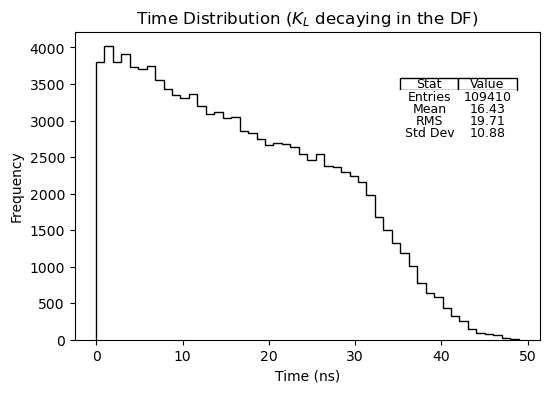

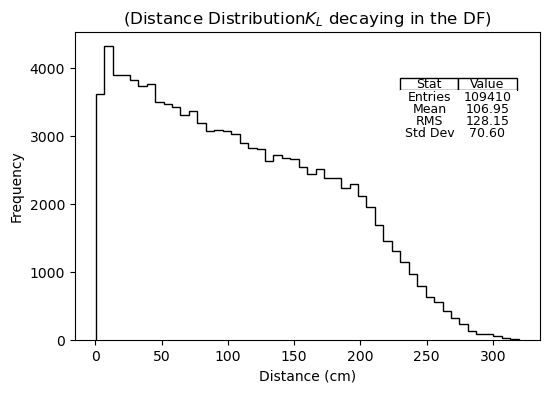

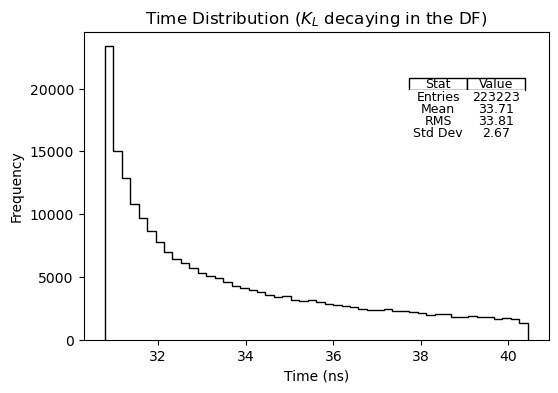

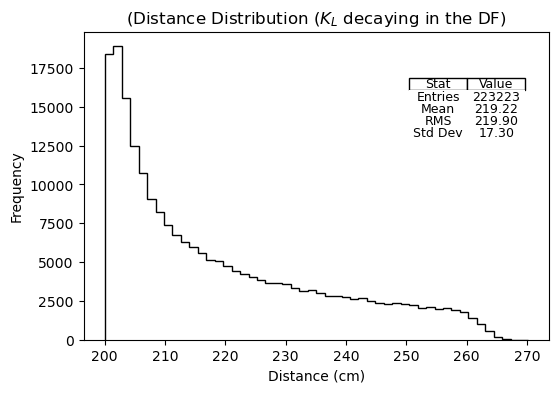

Filtered Particles Count: 223223


In [790]:
res_final_hits1 = res_final_hits[(res_final_hits['distance'] >= 200) & (res_final_hits['time_to_reach'] >= 30.778)] 

plot_histogram_with_stats(res_final_miss['time_to_reach'], r"Time Distribution ($K_L$ decaying in the DF)", 'Time (ns)')
plot_histogram_with_stats(res_final_miss['distance'], r"(Distance Distribution$K_L$ decaying in the DF)", 'Distance (cm)')


plot_histogram_with_stats(res_final_hits1['time_to_reach'], r"Time Distribution ($K_L$ decaying in the DF)", 'Time (ns)')
plot_histogram_with_stats(res_final_hits1['distance'], r"(Distance Distribution ($K_L$ decaying in the DF)", 'Distance (cm)')

# You can now do further analysis on filtered_hits or plot results
print("Filtered Particles Count:", len(res_final_hits1))



Cut on time

In [791]:

# Filter particles based on time
def filter_particles(particles):
    filtered_particles = []
    
    # Speed of light in cm/ns
    c = 29.9792  # cm/ns

    for particle in particles:
        energy = particle['energy']  # Energy in MeV
        theta = particle['theta']
        T_KLcrash = particle['time_to_reach']

        # Calculate Delta T
        DT = T_KLcrash - (R_cal / (c * beta))
        
        sigma_t = np.sqrt((54e-3 / np.sqrt(energy / 1000.0))**2 + (100e-3)**2)

        # Apply the conditions
        if  -5 * sigma_t < DT < 5 * sigma_t:
            filtered_particles.append(particle)

    return np.array(filtered_particles)

# Assuming res_final_hits is already populated with the relevant data
filtered_hits = filter_particles(res_final_hits1)

# You can now do further analysis on filtered_hits or plot results
print("Filtered Particles Count:", len(filtered_hits))


Filtered Particles Count: 53887


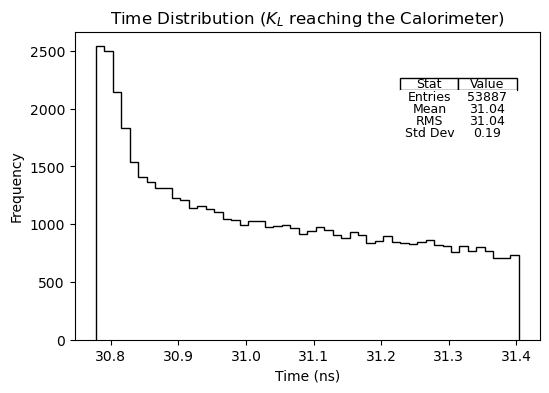

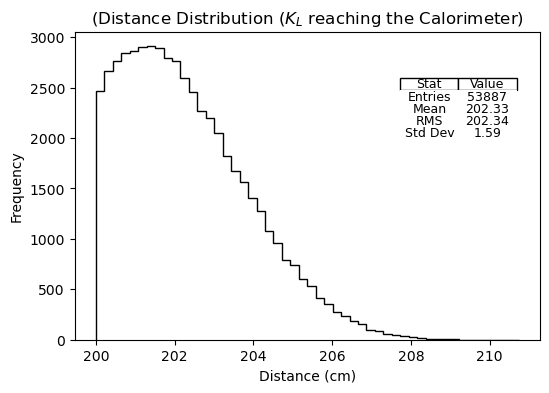

In [792]:
# Plot histograms for particles that hit the cylinder

plot_histogram_with_stats(filtered_hits['time_to_reach'], r"Time Distribution ($K_L$ reaching the Calorimeter)", 'Time (ns)')
plot_histogram_with_stats(filtered_hits['distance'], r"(Distance Distribution ($K_L$ reaching the Calorimeter)", 'Distance (cm)')

#### Transverse distribution for $K_L$ decaying inside the Drift Chamber

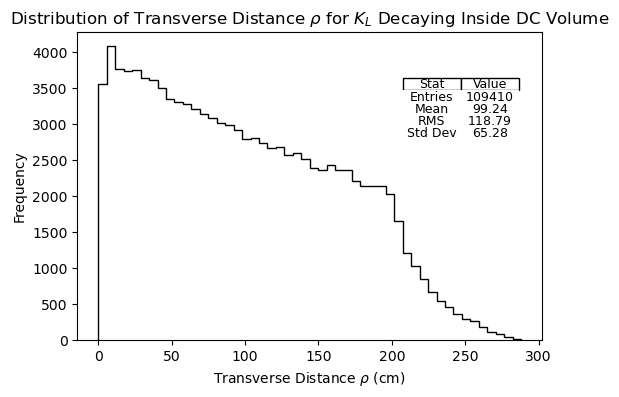

In [793]:

# Assuming 'res_final_miss' is the structured array containing the particles that did not hit the calorimeter
# Calculate transverse distance using r and theta
transverse_distances = res_final_miss['distance'] * np.sin(np.deg2rad(res_final_miss['theta']))

plot_histogram_with_stats(transverse_distances, r'Distribution of Transverse Distance $\rho$ for $K_L$ Decaying Inside DC Volume', r'Transverse Distance $\rho$ (cm)')


### Geometrical acceptance

In [727]:
# Total number of particles generated
total_particles = N

# Geometrical acceptance calculations
geometrical_acceptance_inside = len(res_final_miss) / total_particles
geometrical_acceptance_outside = len(filtered_hits) / total_particles

print(f"Geometrical Acceptance (Inside): {geometrical_acceptance_inside *100:.2f}%")
print(f"Geometrical Acceptance (Outside): {geometrical_acceptance_outside*100:.2f}%")

Geometrical Acceptance (Inside): 43.02%
Geometrical Acceptance (Outside): 21.19%


Geometrical Acceptance (Inside): 43.02%

Geometrical Acceptance (Outside): 21.19%

### Histogram Analysis and Statistical Behaviors

#### 1. **Theta and Phi Distributions**
- **Theta Distribution**: This histogram likely shows a sinusoidal pattern that peaks around 90 degrees, which is expected if the angular distribution $ \sin^3 \theta $ is correctly implemented. This peak indicates that $ K_L $ particles are most likely to decay at angles perpendicular to the beam direction, reflecting angular momentum conservation in decay processes.
- **Phi Distribution**: Given that phi is uniformly distributed, the histogram should ideally show a flat distribution, indicating isotropy in the azimuthal decay distribution. This uniformity suggests no preferred direction of decay in the azimuthal plane, adhering to the expected isotropic nature of particle decays in collider experiments.

#### 2. **Decay Time and Distance Distributions**
- **Decay Time Distribution**: Exhibits an exponential decay characteristic of unstable particles like $ K_L $ mesons. The mean of this histogram should align closely with the lifetime parameter $ \tau $ used in the simulation (51.16 ns), reflecting the random, memoryless property of radioactive decay.
- **Distance Distribution**: This histogram should also show an exponentially decaying pattern, indicating that the probability of a particle decaying is independent of its history and solely dependent on the decay constant. The scale of this distribution is determined by the decay constant multiplied by the speed of the particle.

#### 3. **Energy Distribution and Smearing**
- **Smeared Energy Distribution**: If Gaussian smearing is correctly applied, the histogram of smeared energies should appear broader than the unsmeared version. This broadening represents the uncertainty in energy measurement introduced by detector resolution, potentially shifting the peak of the distribution depending on the mean and variance of the Gaussian noise added.

#### 4. **Transverse Distance Distribution for Decays inside the Drift Chamber**
- **Transverse Distance ($\rho$)**: This histogram illustrates the distance from the beam axis at which $ K_L $ mesons decay within the drift chamber. A concentration of events closer to zero suggests many decays occur near the beam line, while a wider spread indicates a significant number of particles travel farther before decaying.

#### 5. **Geometrical Acceptance**
- The calculated geometrical acceptance rates for particles decaying inside and outside the detector reflect the efficiency and coverage of the detector setup. Higher acceptance inside suggests good detector sensitivity to particles decaying within its bounds, while acceptance outside shows how well the detector captures or ignores particles decaying outside its physical limits.

#### Statistical Summary in Histograms
The tables included in each histogram provide a quick statistical summary:
- **Entries**: Total count of data points considered in the histogram, offering a sense of the statistical sample size.
- **Mean**: The average value of the dataset, indicating the central tendency.
- **RMS (Root Mean Square)**: Provides a measure of the spread of the data around the mean, heavily influenced by outliers.
- **Standard Deviation**: Another measure of data dispersion, showing how much variation exists from the average.

Each histogram and its statistics help in understanding the underlying distributions and effects of various simulation parameters on the behavior of $ K_L $ mesons. These insights are crucial for verifying the correctness of the simulation model and for making adjustments to the experimental setup or theoretical model.
